In [1]:
import os
os.sys.path.insert(0, os.path.abspath('../src'))
from elisa.data.ogip import Data

In [6]:
det = 'n7'
spec = f'/Users/xuewc/ObsData/GRB231115A/GBM/{det}.pha'
back = f'/Users/xuewc/ObsData/GRB231115A/GBM/{det}.bak'
resp = f'/Users/xuewc/ObsData/GRB231115A/GBM/{det}.rsp'
d = Data((8, 900), spec, back, resp, name=det, group='bpos', scale=0.001)

In [1]:
import os
os.sys.path.insert(0, os.path.abspath('../src'))
from elisa.data.ogip import Data
from elisa.inference.fit import BaseFit
from elisa.model import *
path = '/Users/xuewc/ObsData/FRB221021/HXMT/'
LE = Data([5, 10], f'{path}/LE_optbmin5.fits',
          f'{path}/LE_phabkg20s_g0_0-94.pha', f'{path}/LE_rsp.rsp',
          group='bmin', scale=25)

ME = Data([10, 35], f'{path}/ME_optbmin5.fits',
          f'{path}/ME_phabkg20s_g0_0-53.pha', f'{path}/ME_rsp.rsp',
          group='bmin', scale=25)

HE = Data([28, 250], f'{path}/HE_optbmin5.fits',
          f'{path}/HE_phabkg20s_g0_0-12.pha', f'{path}/HE_rsp.rsp',
          group='bmin', scale=25)
f = BaseFit([LE, ME, HE], Powerlaw(), 'wstat')
model = f._generate_numpyro_model()

  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

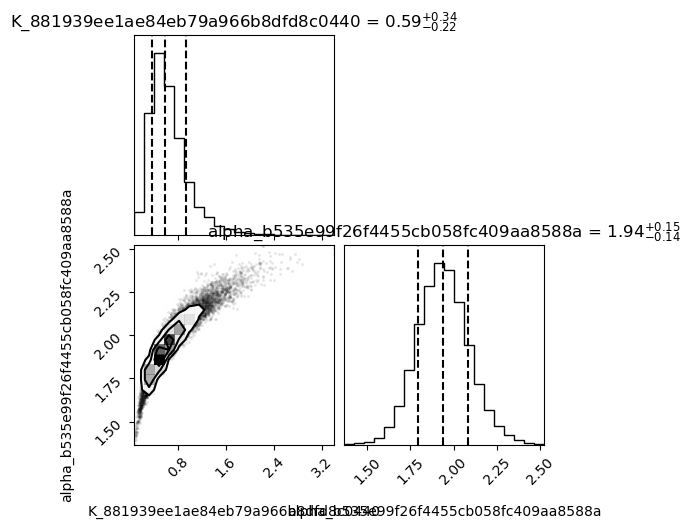

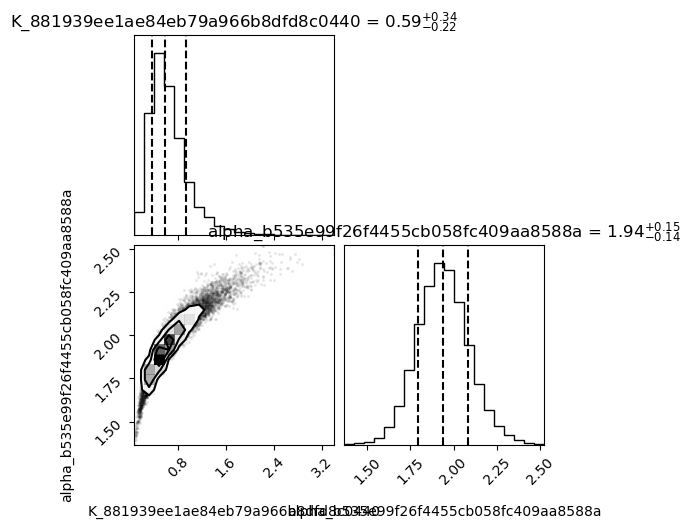

In [3]:
import jax
jax.config.update("jax_enable_x64", True)
import arviz as az
import numpyro
numpyro.set_host_device_count(4)
from numpyro import infer

sampler = infer.MCMC(
    infer.NUTS(model),
    num_warmup=2000,
    num_samples=10000,
    num_chains=2,
    progress_bar=True,
)
sampler.run(jax.random.PRNGKey(0))
idata = az.from_numpyro(sampler)
import corner
corner.corner(
    idata,
    # axes_scale=['linear', 'linear', 'log', 'log', 'linear', 'log'],
    quantiles=[0.15865, 0.5, 0.84135],
    show_titles=True
)


In [8]:
LE.resp_matrix.shape, ME.resp_matrix.shape, HE.resp_matrix.shape

((1141, 5), (660, 24), (485, 153))

In [6]:
f._generate_stat_func_args()

{'LE': (array([8., 9., 6., 1., 4.]),
  array([25., 25., 25., 25., 41.]),
  0.05999995989975942),
 'ME': (array([4., 2., 6., 7., 4., 1., 3., 1., 3., 3., 3., 2., 1., 2., 1., 3., 4.,
         1., 1., 3., 3., 0., 1., 7.]),
  array([25., 26., 25., 27., 25., 25., 25., 27., 25., 25., 26., 25., 26.,
         25., 26., 26., 26., 25., 26., 25., 25., 25., 27., 30.]),
  0.06011905192309841),
 'HE': (array([33., 27., 41., 33., 31., 23., 11., 13.,  9.,  7., 15., 11.,  9.,
         10., 12.,  5., 13., 11., 14., 12., 21., 15., 12., 21., 14.,  6.,
         12., 13.,  8., 17., 18., 12.,  8.,  8.,  4.,  7.,  7.,  2.,  4.,
          2.,  4.,  3.,  6.,  2.,  5.,  2.,  4.,  3.,  3.,  3.,  3.,  2.,
          1.,  0.,  5.,  3.,  2.,  1.,  1.,  5.,  2.,  6.,  2.,  6.,  2.,
          5.,  5.,  1.,  5.,  1.,  1.,  0.,  2.,  4.,  2.,  4.,  2.,  3.,
          8.,  4.,  1.,  3.,  2.,  4.,  2.,  2.,  3.,  3.,  5.,  4.,  2.,
          4.,  0.,  4.,  5.,  3.,  3.,  3.,  6.,  5.,  2.,  4.,  1.,  3.,
          7.,  4., 